In [60]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [64]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI_MASK/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('nomask'):
    output = 0
  if file.startswith('mask'):
    output = 1

  photo = load_img(folder + file, target_size=(40, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/mask_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/mask_labels.npy', labels)

(3500, 40, 40, 3) (3500,)


In [65]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Colab Notebooks/mask_photos.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/mask_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [66]:
#Define và compile CNN model
model = Sequential()
#Convolutional

# Nhân tích chập 32 lần
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (40,40,3), padding= 'same'))
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
# Nhân tích chập 64 lần 
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
# Nhân tích chập 128 lần 
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
#Hàm loại bỏ
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                 

In [67]:
#Tang cuong data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [74]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=128),epochs=10)

<ipython-input-74-dd216444926c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=128),epochs=10)


Epoch 1/10
20/20 [==============================] - 16s 775ms/step - loss: 0.1995 - accuracy: 0.9253
Epoch 2/10
20/20 [==============================] - 15s 763ms/step - loss: 0.2153 - accuracy: 0.9167
Epoch 3/10
20/20 [==============================] - 15s 765ms/step - loss: 0.1870 - accuracy: 0.9237
Epoch 4/10
20/20 [==============================] - 16s 747ms/step - loss: 0.1732 - accuracy: 0.9294
Epoch 5/10
20/20 [==============================] - 16s 772ms/step - loss: 0.1580 - accuracy: 0.9392
Epoch 6/10
20/20 [==============================] - 15s 768ms/step - loss: 0.1682 - accuracy: 0.9351
Epoch 7/10
20/20 [==============================] - 15s 766ms/step - loss: 0.1600 - accuracy: 0.9359
Epoch 8/10
20/20 [==============================] - 15s 773ms/step - loss: 0.1467 - accuracy: 0.9412
Epoch 9/10
20/20 [==============================] - 15s 768ms/step - loss: 0.1511 - accuracy: 0.9388
Epoch 10/10
20/20 [==============================] - 21s 1s/step - loss: 0.1543 - accuracy:

In [75]:
#Độ chính xác của mô hình 
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)


33/33 [==============================] - 2s 46ms/step - loss: 7.3607 - accuracy: 0.9352
Accuracy: 0.9352381229400635
Loss: 7.360721588134766


<function matplotlib.pyplot.show(close=None, block=None)>

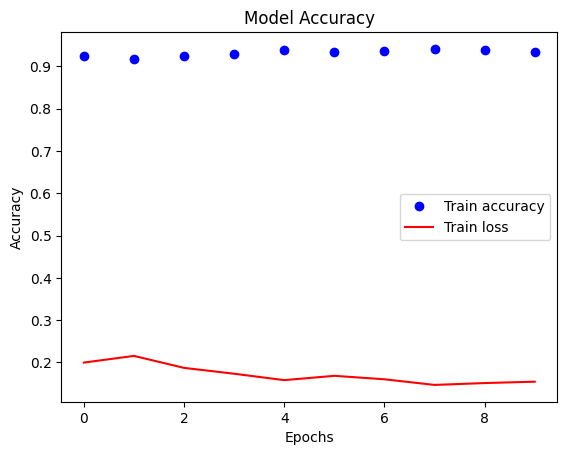

In [76]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [79]:
# Lưu lại dữ liệu sau khi train
model.save('/content/drive/MyDrive/CHECK/MASK5.h5')

In [81]:
#Load mô hình đã lưu
from keras.models import load_model
model = load_model('/content/drive/MyDrive/CHECK/MASK5.h5')

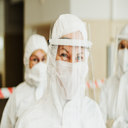

1/1 [==============================] - 0s 26ms/step
['Mask']


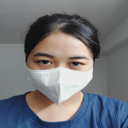

1/1 [==============================] - 0s 34ms/step
['Mask']


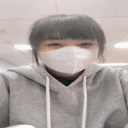

1/1 [==============================] - 0s 24ms/step
['Mask']


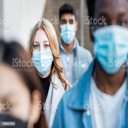

1/1 [==============================] - 0s 27ms/step
['Mask']


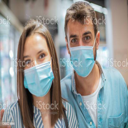

1/1 [==============================] - 0s 25ms/step
['Mask']


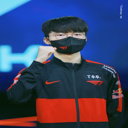

1/1 [==============================] - 0s 25ms/step
['Mask']


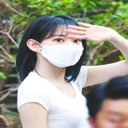

1/1 [==============================] - 0s 24ms/step
['Mask']


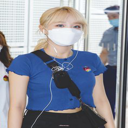

1/1 [==============================] - 0s 28ms/step
['Mask']


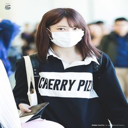

1/1 [==============================] - 0s 30ms/step
['Mask']


In [77]:
from PIL import Image
import numpy as np
import os
#Tạo mảng để chứa label
label = np.array(['No Mask', 'Mask'])

# Kích thước mới của ảnh
new_size = (128, 128)
predict_size = (40,40)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/CHECK/MASK/'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,40,40,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])

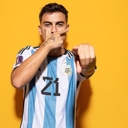

1/1 [==============================] - 0s 27ms/step
['No Mask']


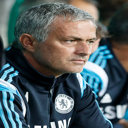

1/1 [==============================] - 0s 27ms/step
['No Mask']


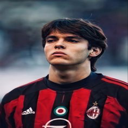

1/1 [==============================] - 0s 26ms/step
['No Mask']


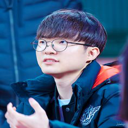

1/1 [==============================] - 0s 27ms/step
['Mask']


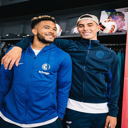

1/1 [==============================] - 0s 28ms/step
['No Mask']


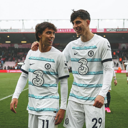

1/1 [==============================] - 0s 25ms/step
['Mask']


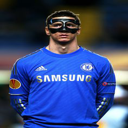

1/1 [==============================] - 0s 25ms/step
['No Mask']


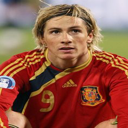

1/1 [==============================] - 0s 27ms/step
['No Mask']


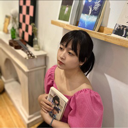

1/1 [==============================] - 0s 30ms/step
['No Mask']


In [78]:
# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/CHECK/NO MASK/'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,40,40,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])